<a href="https://colab.research.google.com/github/tamil618/Batch-4/blob/main/source_code_for_fake_news-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
#Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data
#analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily.
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
#used for bag of words and it extract feature from text document
from sklearn.feature_extraction.text import TfidfTransformer
#tfid = term frequency is used for
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#cross velidation when setting different parameters

In [ ]:
fake = pandas.read_csv(r"/fake news - Sheet1 (1).csv")
true = pandas.read_csv(r"/true news - Sheet1.csv")

In [ ]:
fake.shape

(6, 4)

In [ ]:
true.shape

(7, 4)

In [ ]:
fake.head()

,TITLE,TEXT,SUBJECT,DATE,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,news,"Dec 31,2017",fake
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,news,"Dec 27,2017",fake
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwau...",news,"Dec 20,2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",news,"Dec 15,2017",fake
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,news,"Dec 10,2017",fake


In [ ]:
true.head()

,TITLE,TEXT,SUBJECT,DATE
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politics news,"Dec 31,2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politics news,"Dec 27,2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politics news,"Dec 20,2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politics news,"Dec 15,2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics news,"Dec 10,2017"


In [ ]:
#add flag to track fake and real
fake['target']='fake'
true['target']='true'


In [ ]:
fake.head()

,TITLE,TEXT,SUBJECT,DATE,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,news,"Dec 31,2017",fake
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,news,"Dec 27,2017",fake
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwau...",news,"Dec 20,2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",news,"Dec 15,2017",fake
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,news,"Dec 10,2017",fake


In [ ]:
true.head()

,TITLE,TEXT,SUBJECT,DATE,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politics news,"Dec 31,2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politics news,"Dec 27,2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politics news,"Dec 20,2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politics news,"Dec 15,2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics news,"Dec 10,2017",true


In [ ]:
#combine datasets
data = pandas.concat([fake,true]).reset_index(drop=True)
data.shape

(13, 5)

In [ ]:
data.head()

,TITLE,TEXT,SUBJECT,DATE,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,news,"Dec 31,2017",fake
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,news,"Dec 27,2017",fake
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwau...",news,"Dec 20,2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",news,"Dec 15,2017",fake
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,news,"Dec 10,2017",fake


In [ ]:
data.tail()

,TITLE,TEXT,SUBJECT,DATE,target
8,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politics news,"Dec 20,2017",true
9,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politics news,"Dec 15,2017",true
10,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics news,"Dec 10,2017",true
11,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politics news,"Dec 5,2017",true
12,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politics news,"Dec 1,2017",true


In [ ]:
#shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data.head()

,TITLE,TEXT,SUBJECT,DATE,target
0,Racist Alabama Cops Brutalize Black Boy While ...,The number of cases of cops brutalizing and ki...,news,"Dec 5,2017",fake
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politics news,"Dec 31,2017",true
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwau...",news,"Dec 20,2017",fake
3,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics news,"Dec 10,2017",true
4,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,news,"Dec 31,2017",fake


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TITLE    13 non-null     object
 1   TEXT     13 non-null     object
 2   SUBJECT  13 non-null     object
 3   DATE     13 non-null     object
 4   target   13 non-null     object
dtypes: object(5)
memory usage: 652.0+ bytes


In [ ]:
import pandas

# Assuming your data is in 'fake news - Sheet1.csv' and 'true news - Sheet1.csv'
fake = pandas.read_csv(r"/fake news - Sheet1 (1).csv")
true = pandas.read_csv(r"/true news - Sheet1.csv")

#add flag to track fake and real
fake['target']='fake'
true['target']='true'

#combine datasets
data = pandas.concat([fake,true]).reset_index(drop=True)

# Now you can use data
data.isnull().sum()

,0
TITLE,0
TEXT,0
SUBJECT,0
DATE,0
target,0


In [ ]:
#remove date
if 'date' in data.columns:
    data.drop(['date'], axis=1, inplace=True)
else:
    print("Column 'date' not found in the DataFrame.")
data.head()

Column 'date' not found in the DataFrame.


,TITLE,TEXT,SUBJECT,DATE,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,NEWS,"Dec 31,2017",fake
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,NEWS,"Dec 27,2017",fake
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwau...",NEWS,"Dec 20,2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",NEWS,"Dec 15,2017",fake
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,NEWS,"Dec 10,2017",fake


In [ ]:
#Convert uppercase case
if 'SUBJECT' in data.columns:
    data['SUBJECT'] = data['SUBJECT'].apply(lambda x: x.upper())
else:
    print("Column 'SUBJECT' not found in the DataFrame.")
data.head()

,TITLE,TEXT,SUBJECT,DATE,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,NEWS,"Dec 31,2017",fake
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,NEWS,"Dec 27,2017",fake
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwau...",NEWS,"Dec 20,2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",NEWS,"Dec 15,2017",fake
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,NEWS,"Dec 10,2017",fake


target
fake    6
true    7
Name: SUBJECT, dtype: int64


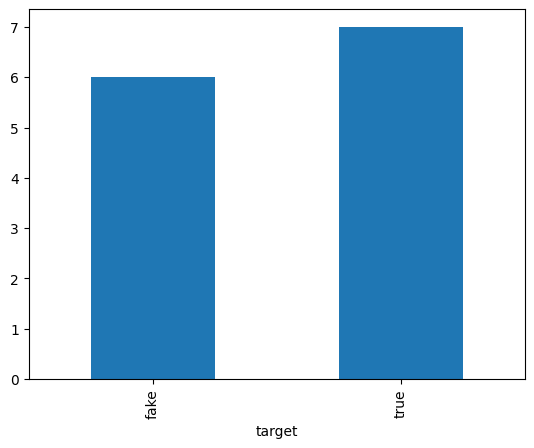

In [ ]:
import pandas
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# ... (Rest of the code remains the same)

#how many fake and real
print(data.groupby(['target'])['SUBJECT'].count()) # Changed 'text' to 'SUBJECT'
data.groupby(['target'])['SUBJECT'].count().plot(kind="bar") # Changed 'text' to 'SUBJECT'
plt.show()

In [ ]:
# Most frequent words counter
import nltk # Import the nltk library
from nltk import tokenize
from nltk import FreqDist # Import FreqDist
import seaborn as sns # Import seaborn as sns
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase) # Use FreqDist without nltk prefix
    df_frequency = pandas.DataFrame({"Word": list(frequency.keys()),
                                     "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequency, x="Word", y="Frequency", color='blue') # Now sns is defined
    ax.set(ylabel="Count")
    plt.xticks(rotation='vertical')
    plt.show()

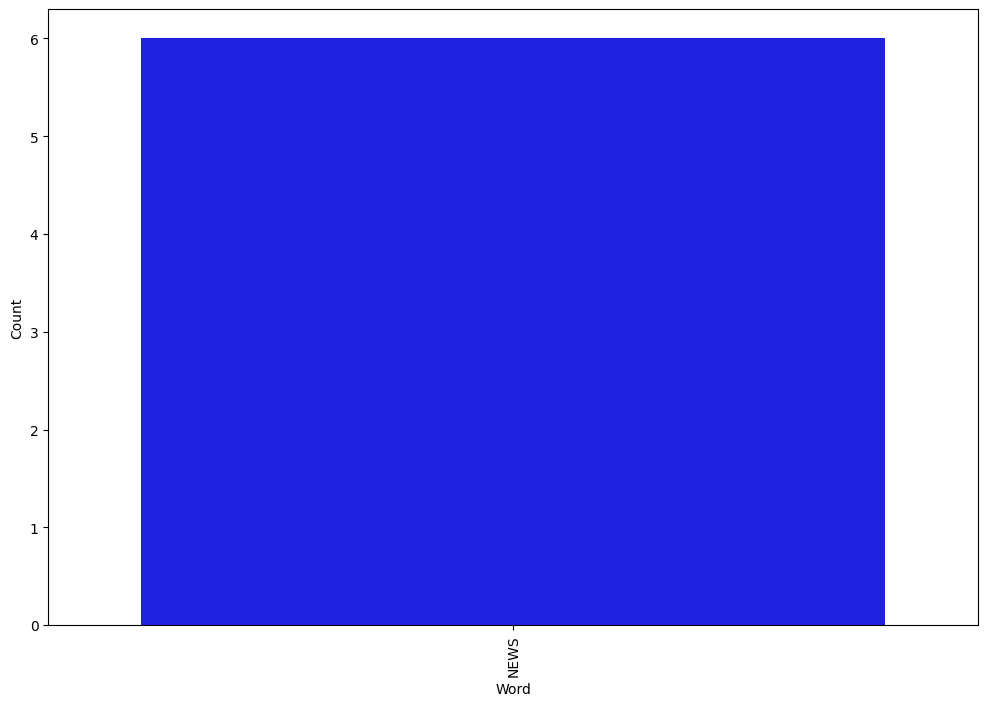

In [ ]:
#most frequent words in fake news
counter(data[data["target"] == "fake"], "SUBJECT", 20)

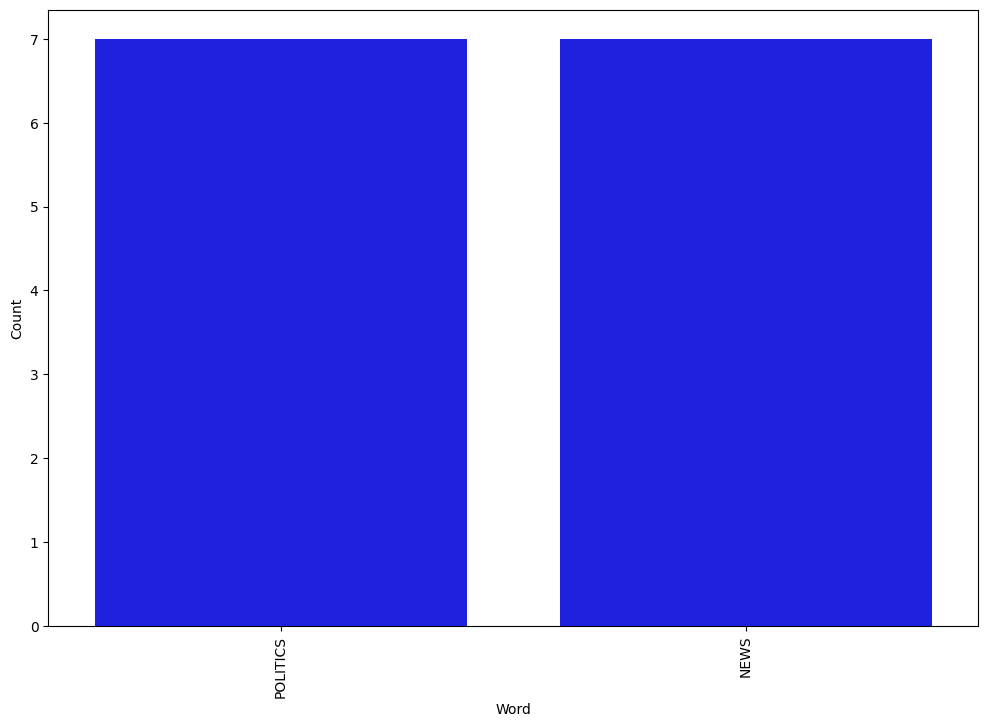

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "SUBJECT", 20)